
📝 Generated Text:
 there was a brave knight who went on a quest to rescue the princess from the dragon the knight fought bravely and won the battle

🔍 Visualizing transitions...


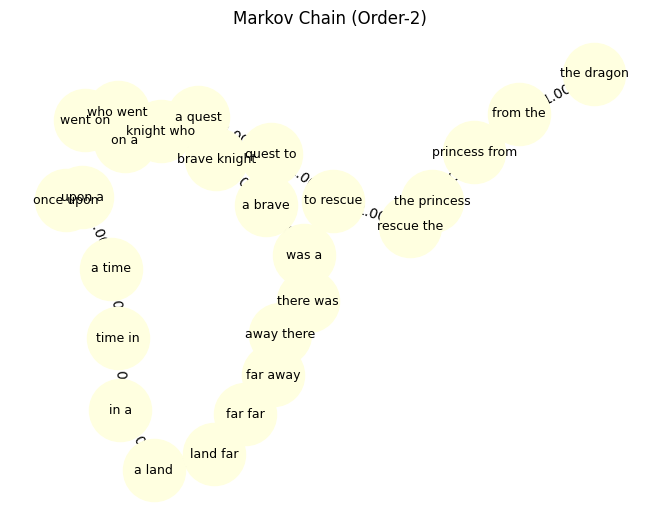

In [ ]:
import random
import pickle
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict


class MarkovChainWordNgram:
    def __init__(self, order=2):
        self.order = order
        self.transitions = defaultdict(lambda: defaultdict(int))
        self.probabilities = defaultdict(dict)

    def train(self, text):
        words = text.split()
        for i in range(len(words) - self.order):
            context = tuple(words[i:i+self.order])
            next_word = words[i + self.order]
            self.transitions[context][next_word] += 1

        for context, next_words in self.transitions.items():
            total = sum(next_words.values())
            for next_word, count in next_words.items():
                self.probabilities[context][next_word] = count / total

    def generate(self, length=20, seed=None):
        if seed is None or len(seed) < self.order:
            seed = random.choice(list(self.probabilities.keys()))
        result = list(seed)
        current = tuple(seed)

        for _ in range(length - self.order):
            next_words = self.probabilities.get(current)
            if not next_words:
                break
            next_word = random.choices(
                population=list(next_words.keys()),
                weights=list(next_words.values())
            )[0]
            result.append(next_word)
            current = tuple(result[-self.order:])

        return ' '.join(result)

    def visualize(self, max_edges=30):
        G = nx.DiGraph()
        edge_count = 0

        for context, next_words in self.probabilities.items():
            for next_word, prob in next_words.items():
                source = ' '.join(context)
                target = ' '.join((*context[1:], next_word))  # Shift forward
                label = f"{prob:.2f}"
                G.add_edge(source, target, weight=prob, label=label)
                edge_count += 1
                if edge_count >= max_edges:
                    break
            if edge_count >= max_edges:
                break

        pos = nx.spring_layout(G, seed=42)
        edge_labels = nx.get_edge_attributes(G, 'label')
        nx.draw(G, pos, with_labels=True, node_color='lightyellow', node_size=2000, font_size=9, arrows=True)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
        plt.title(f"Markov Chain (Order-{self.order})")
        plt.show()


# === RUN THE DEMO ===
if __name__ == "__main__":
    sample_text = """
    once upon a time in a land far far away there was a brave knight
    who went on a quest to rescue the princess from the dragon
    the knight fought bravely and won the battle and peace returned to the kingdom
    """

    # Setup
    mc = MarkovChainWordNgram(order=2)
    mc.train(sample_text)

    # Generate text
    generated = mc.generate(length=25)
    print("\n📝 Generated Text:\n", generated)

    # Visualize the chain
    print("\n🔍 Visualizing transitions...")
    mc.visualize(max_edges=25)


In [ ]:
import random
from collections import defaultdict, Counter

class MarkovChain:
    def __init__(self, n=2, level="word"):
        """
        n: Order of the Markov model (1-gram, 2-gram, etc.).
        level: "word" for word-based model, "char" for character-based model.
        """
        self.n = n
        self.level = level
        self.chain = defaultdict(list)
        self.probabilities = {}

    def train(self, text):
        """Trains the Markov chain model from input text."""
        data = text.split() if self.level == "word" else list(text)

        for i in range(len(data) - self.n):
            prefix = tuple(data[i:i+self.n])
            next_item = data[i+self.n]
            self.chain[prefix].append(next_item)

        self._calculate_probabilities()

    def _calculate_probabilities(self):
        """Calculates probability distributions for next words/characters."""
        for prefix, items in self.chain.items():
            counts = Counter(items)
            total = sum(counts.values())
            self.probabilities[prefix] = {word: count / total for word, count in counts.items()}

    def generate_text(self, length=50, seed=None):
        """Generates text based on the trained Markov model."""
        if not self.chain:
            raise ValueError("Model is not trained yet!")

        if seed is None or tuple(seed.split() if self.level == "word" else list(seed)) not in self.chain:
            seed = random.choice(list(self.chain.keys()))
        else:
            seed = tuple(seed.split() if self.level == "word" else list(seed))

        result = list(seed)

        for _ in range(length - len(seed)):
            current = tuple(result[-self.n:])
            if current not in self.probabilities:
                break

            next_item = random.choices(
                list(self.probabilities[current].keys()),
                weights=self.probabilities[current].values()
            )[0]
            result.append(next_item)

        return " ".join(result) if self.level == "word" else "".join(result)

    def predict_next(self, context, top_n=5):
        """Predicts the next word/character with probabilities."""
        context_tuple = tuple(context.split() if self.level == "word" else list(context))[-self.n:]

        if context_tuple in self.probabilities:
            predictions = sorted(
                self.probabilities[context_tuple].items(), key=lambda x: x[1], reverse=True
            )[:top_n]
            return predictions
        return None


# ==== Interactive Program ====
if __name__ == "__main__":
    input_text = """
    Artificial intelligence is transforming the world. AI models learn from data and improve over time.
    Machine learning is a key part of AI. Predictions help businesses make better decisions.
    """

    print("Welcome to Markov Chain Text Generator!")
    level = input("Choose level (word or char): ").strip().lower()

    if level not in ["word", "char"]:
        print("Invalid level. Please enter 'word' or 'char'.")
        exit()

    n_gram = int(input("Choose n-gram value (e.g., 2 for 2-gram, 3 for 3-gram): "))

    # Create Markov Chain model
    model = MarkovChain(n=n_gram, level=level)
    model.train(input_text)

    while True:
        # Get user input
        seed = input("\nEnter seed word/character to start generating (or 'exit' to quit): ")
        if seed.lower() == "exit":
            print("Goodbye!")
            break

        try:
            # Generate text based on seed
            length = int(input("Enter length of text to generate (e.g., 30): "))
            generated_text = model.generate_text(length=length, seed=seed)
            print("\nGenerated Text:")
            print(generated_text)

            # Predict next words/characters
            predictions = model.predict_next(seed)
            print(f"\nPredictions for '{seed}':")
            if predictions:
                for word, prob in predictions:
                    print(f" - {word}: {prob:.2f}")
            else:
                print("No predictions found.")

        except Exception as e:
            print(f"Error: {e}")


Welcome to Markov Chain Text Generator!
Choose level (word or char): word
Choose n-gram value (e.g., 2 for 2-gram, 3 for 3-gram): 2

Enter seed word/character to start generating (or 'exit' to quit): Machine learning
Enter length of text to generate (e.g., 30): 30

Generated Text:
Machine learning is a key part of AI. Predictions help businesses make better decisions.

Predictions for 'Machine learning':
 - is: 1.00

Enter seed word/character to start generating (or 'exit' to quit): word
Enter length of text to generate (e.g., 30): 35

Generated Text:
from data and improve over time. Machine learning is a key part of AI. Predictions help businesses make better decisions.

Predictions for 'word':
No predictions found.

Enter seed word/character to start generating (or 'exit' to quit): Machine learning
Enter length of text to generate (e.g., 30): 25

Generated Text:
Machine learning is a key part of AI. Predictions help businesses make better decisions.

Predictions for 'Machine learning